<a href="https://colab.research.google.com/github/YokoyamaLab/PythonBasics/blob/main/day04_q2FaceComponents_explanation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day04 課題Q2 の解説

課題ファイルが大きくなるのを防ぐため、このファイルにて課題の説明をします。課題の提出物はGoogle Classroomで配布したものですので間違えないようにしてください。

講義中に以下のクラスを定義しました。
- Component
  - Face
  - Eyes
  - Mouth
  - Nose
  - Ears
  - Hair
    - SmoothHair

これらのクラス定義を[一つのPythonファイルにして、講義共有フォルダにface_component.pyというファイル名で格納](https://drive.google.com/drive/folders/1mMOr87_L4iUZDg9mnIpqxNORFNIJ4JJT?usp=share_link)してあります。あるPythonプログラム内で別のPythonファイルに書いてあるコードを読みこむには**import**文を使います。

In [17]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/Shareddrives/2023-35A01／情報科学 c/lib

from face_component import Component,Face,Eyes,Ears,Mouth,Nose,Hair,SmoothHair
from PIL import Image, ImageDraw, ImageFont
import math

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/Shareddrives/2023-35A01／情報科学 c/lib


では、この状態から、皆さん一人ひとりに割り当てられたパーツを描くのが今回の宿題で。

上記のimport文が成功していればEyesクラス(や全てのクラス)はすでに定義済みです。

では、Eyesクラスを継承して、独自のSmileEyesクラスを作っていきましょう。（Componentクラスではなく、Eyesクラスを継承しましょう。issubclassを使って目であると後から判定可能です。）

にっこりの目ですから円弧で描くのが楽でしょう。


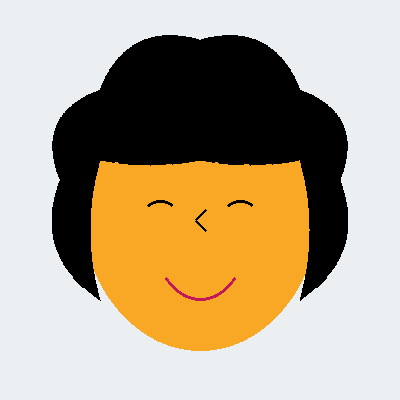

In [18]:
class SmileEyes(Eyes):
  def __init__(self,skincolor):
    super().__init__(skincolor)
    self.feature = "笑っている目"

  def draw(self,canvas):
    x = 160
    y = 220
    r = 20
    canvas.arc(
      [(x-r, y-r), (x+r, y+r)],  # 左上のxy座標、右下のXY座標
      fill=(0,0,0),              # 塗りの色
      start=270-40,
      end=270+40,
      width=3
    )
    x = 400 - x
    canvas.arc(
      [(x-r, y-r), (x+r, y+r)],  # 左上のxy座標、右下のXY座標
      fill=(0,0,0),               # 塗りの色
      start=270-40,
      end=270+40,
      width=3
    )

# ここから検証用コード
image = Image.new("RGBA", (400, 400), (236, 239, 241))
canvas = ImageDraw.Draw(image)
skincolor=(249, 168, 37)
face = Face(skincolor)
face.draw(canvas)
eyes = SmileEyes(skincolor)
eyes.draw(canvas)
mouth = Mouth(skincolor)
mouth.draw(canvas)
nose = Nose(skincolor)
nose.draw(canvas)
ears = Ears(skincolor)
ears.draw(canvas)
hair = SmoothHair(skincolor)
hair.draw(canvas)
image.show()

つぶらな瞳が笑っている目に変わりました。このように、ベースのパーツのクラスを継承して、独自のパーツを実装しましょう。

次回の演習時間に、みんなで作ったパーツを組み合わせて、様々な顔を描きく部分を講義時間丸々つかい、実装します。